# Alex Solovev

## Is there a correlation between the category of a startup, its success, and the most popular industry of a country?

An example for my reserach question would be: Would media startups be more successful in Los Angeles than in Moscow?

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
!jt -t oceans16

In [12]:
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )

In [13]:
df = pd.read_csv('../data/raw/ks-projects-201801.csv')
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


## Milestone 3

In this milestone, I will manipulate with the data I have 

### Task 1

In [14]:
print("(Rows : Columns) respectively:", df.shape)
print("Columns in the dataset:", df.columns)

(Rows : Columns) respectively: (378661, 15)
Columns in the dataset: Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


In [54]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
goal,378661.0,49080.791521,1.183391e+06,0.01,2000.00,5200.00,16000.00,1.000000e+08
pledged,378661.0,9682.979339,9.563601e+04,0.00,30.00,620.00,4076.00,2.033899e+07
usd pledged,374864.0,7036.728867,7.863975e+04,0.00,16.98,394.72,3034.09,2.033899e+07
usd_pledged_real,378661.0,9058.924074,9.097334e+04,0.00,31.00,624.33,4050.00,2.033899e+07
usd_goal_real,378661.0,45454.401465,1.152950e+06,0.01,2000.00,5500.00,15500.00,1.663614e+08


In [55]:
df.describe(include='object').T

,count,unique,top,freq
name,378657,375764,New EP/Music Development,41
category,378661,159,Product Design,22314
main_category,378661,15,Film & Video,63585
currency,378661,14,USD,295365
deadline,378661,3164,2014-08-08,705
launched,378661,378089,1970-01-01 01:00:00,7
state,378661,6,failed,197719
country,378661,23,US,292627


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.000000,378661.000000,378661.000000,378661.000000,374864.000000,378661.000000,378661.000000
mean,1074731191.988755,49080.791521,9682.979339,105.617476,7036.728867,9058.924074,45454.401465
std,619086204.322627,1183391.259093,95636.010005,907.185035,78639.745308,90973.343107,1152950.055088
min,5971.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,538263516.000000,2000.000000,30.000000,2.000000,16.980000,31.000000,2000.000000
50%,1075275634.000000,5200.000000,620.000000,12.000000,394.720000,624.330000,5500.000000
75%,1610148624.000000,16000.000000,4076.000000,56.000000,3034.090000,4050.000000,15500.000000
max,2147476221.000000,100000000.000000,20338986.270000,219382.000000,20338986.270000,20338986.270000,166361390.710000


In [58]:
df.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [59]:
df.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

### Task 2-3

In [62]:
import project_functions1 as p1

SyntaxError: invalid syntax (project_functions1.py, line 6)

In [ ]:
data = '../data/raw/Gamesales.csv'
dfu = p

In [15]:
df_short = df[(df['backers'] > 15) & (df['backers'] < 20)]

In [16]:
del df_short['ID']
del df_short['name']
del df_short['currency']
del df_short['deadline']
del df_short['goal']
del df_short['launched']
del df_short['pledged']
del df_short['usd pledged']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='state', ylabel='main_category'>

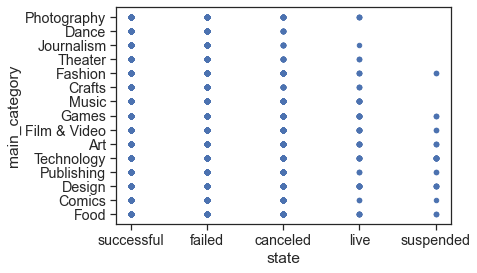

In [17]:
df_short.plot(kind='scatter', x='state', y='main_category')
##With that plot, I can see that most of the countries created startups for all the categories, although I can also see that no "Journalism", "Dance", "Crafts" startups were created in JP Japan

In [18]:
df.shape

(378661, 15)

In [19]:
df_short.shape

(13199, 7)

In [20]:
df.columns
#the command returns the names of the columns in the dataset

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [21]:
df_short.columns

Index(['category', 'main_category', 'state', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [22]:
df_short['country'].value_counts().head()

US    10442
GB     1238
CA      521
AU      232
DE      133
Name: country, dtype: int64

In [23]:
df_us_ind = df_short[df_short['country'].str.contains('US')]
df_us_ind = df_us_ind[df_us_ind.main_category == 'Music']
df_us_ind = df_us_ind[df_us_ind['state'].str.contains('canceled')==False]
df_us_ind = df_us_ind[df_us_ind['state'].str.contains('live')==False]
df_us_ind = df_us_ind[df_us_ind['state'].str.contains('suspended')==False]
df_us_ind.head()

,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real
358,Rock,Music,failed,19,US,1005.0,3500.0
650,Music,Music,successful,18,US,1000.0,1000.0
938,Rock,Music,successful,17,US,665.0,500.0
987,Music,Music,successful,16,US,2000.0,2000.0
1065,World Music,Music,failed,16,US,1550.0,7000.0


In [24]:
df_us_ind['state'].value_counts()

successful    887
failed        654
Name: state, dtype: int64

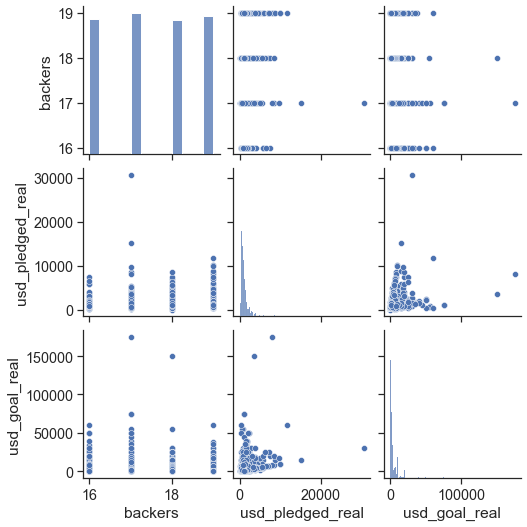

In [25]:
sns.pairplot(df_us_ind)

<AxesSubplot:xlabel='usd_pledged_real'>

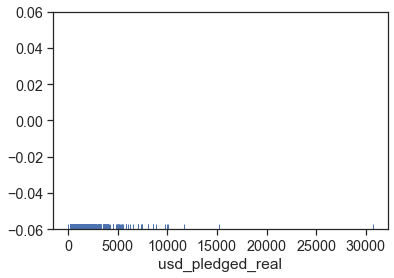

In [26]:
sns.rugplot(df_us_ind['usd_pledged_real'])

<AxesSubplot:xlabel='state', ylabel='count'>

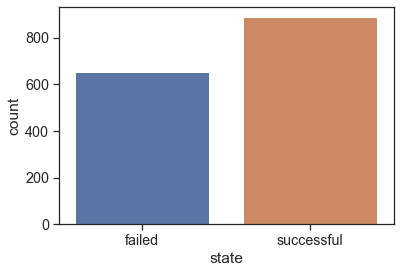

In [27]:
sns.countplot(x='state',data=df_us_ind)

<AxesSubplot:xlabel='usd_pledged_real', ylabel='Density'>

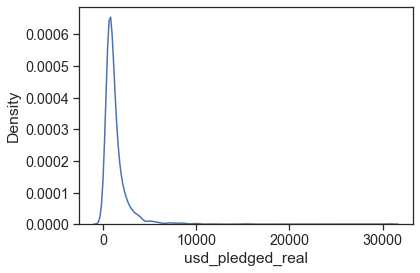

In [28]:
sns.kdeplot(df_us_ind['usd_pledged_real'])

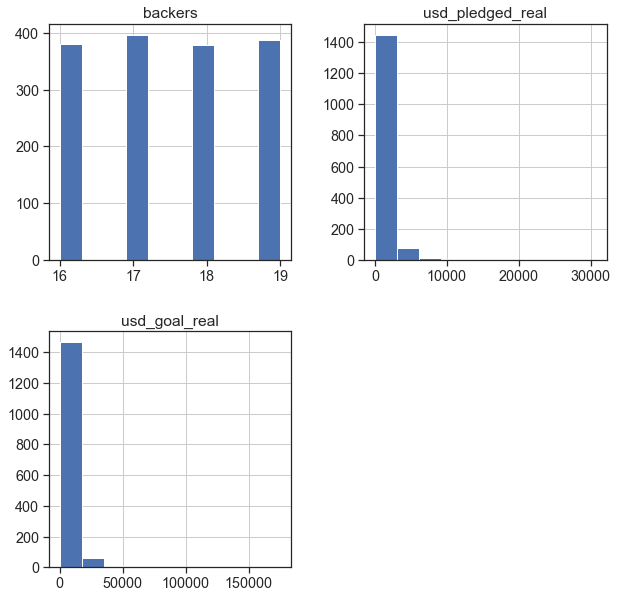

In [29]:
#histograms for each variable in dataset
df_us_ind = df_us_ind.hist(bins=10,figsize =(10,10))

In [30]:
df_gb_ind = df_short[df_short['country'].str.contains('GB')]
df_gb_ind = df_gb_ind[df_gb_ind.main_category == 'Publishing']
df_gb_ind = df_gb_ind[df_gb_ind['state'].str.contains('canceled')==False]
df_gb_ind = df_gb_ind[df_gb_ind['state'].str.contains('live')==False]
df_gb_ind = df_gb_ind[df_gb_ind['state'].str.contains('suspended')==False]
df_gb_ind.head()

,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real
2011,Poetry,Publishing,successful,17,GB,192.95,19.99
3250,Children's Books,Publishing,failed,16,GB,357.94,1023.78
3660,Nonfiction,Publishing,successful,19,GB,4008.00,3763.99
7178,Publishing,Publishing,successful,17,GB,338.73,285.84
7314,Publishing,Publishing,failed,16,GB,1170.24,74761.22


In [31]:
df_gb_ind['state'].value_counts()

failed        63
successful    43
Name: state, dtype: int64

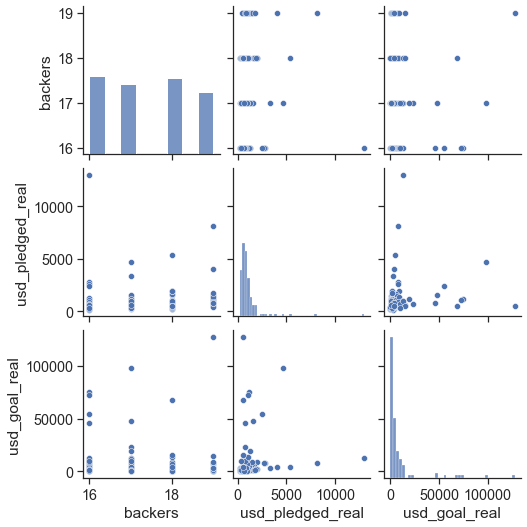

In [32]:
sns.pairplot(df_gb_ind)

<AxesSubplot:xlabel='usd_pledged_real'>

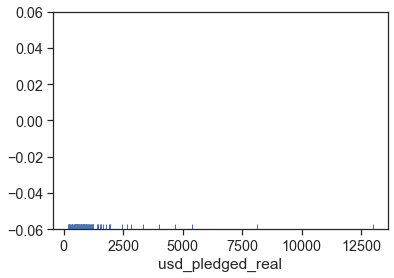

In [33]:
sns.rugplot(df_gb_ind['usd_pledged_real'])

<AxesSubplot:xlabel='state', ylabel='count'>

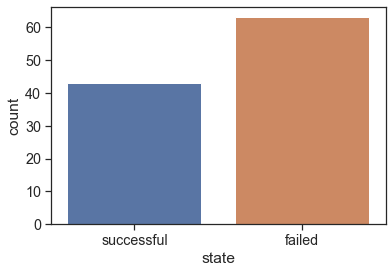

In [34]:
sns.countplot(x='state',data=df_gb_ind)

<AxesSubplot:xlabel='usd_pledged_real', ylabel='Density'>

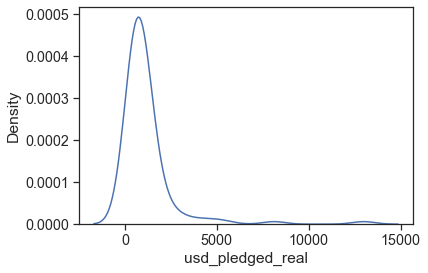

In [35]:
sns.kdeplot(df_gb_ind['usd_pledged_real'])

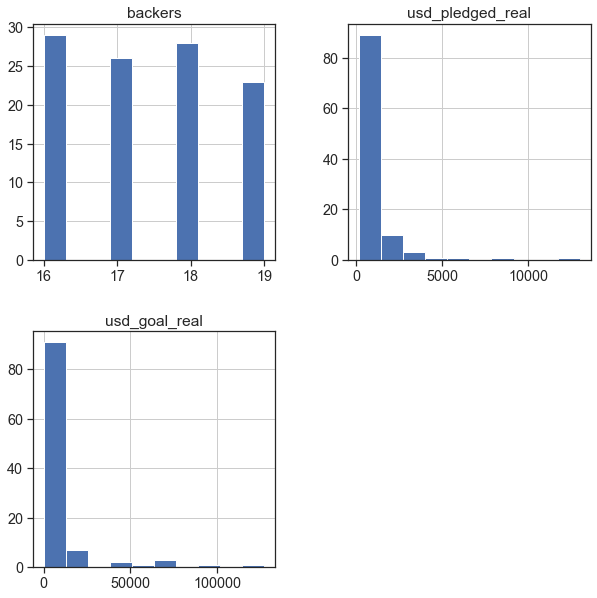

In [36]:
#histograms for each variable in dataset
df_gb_ind = df_gb_ind.hist(bins=10,figsize =(10,10))

In [37]:
df_fr_ind = df_short[df_short['country'].str.contains('FR')]
df_fr_ind = df_fr_ind[df_fr_ind.main_category == 'Art']
df_fr_ind = df_fr_ind[df_fr_ind['state'].str.contains('canceled')==False]
df_fr_ind = df_fr_ind[df_fr_ind['state'].str.contains('live')==False]
df_fr_ind = df_fr_ind[df_fr_ind['state'].str.contains('suspended')==False]
df_fr_ind.head()

,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real
133062,Art,Art,successful,18,FR,908.59,739.55
156102,Installations,Art,failed,16,FR,785.26,3360.59
276480,Public Art,Art,failed,17,FR,1364.57,17042.94
333076,Illustration,Art,successful,19,FR,380.81,332.10
343033,Public Art,Art,successful,17,FR,10723.51,10273.50


In [38]:
df_fr_ind['state'].value_counts()

successful    4
failed        2
Name: state, dtype: int64

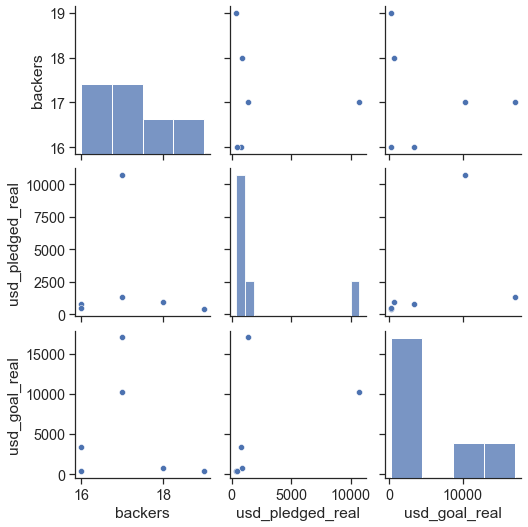

In [39]:
sns.pairplot(df_fr_ind)

<AxesSubplot:xlabel='usd_pledged_real'>

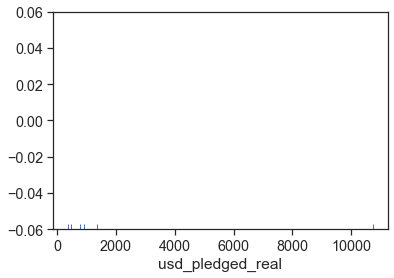

In [40]:
sns.rugplot(df_fr_ind['usd_pledged_real'])

<AxesSubplot:xlabel='state', ylabel='count'>

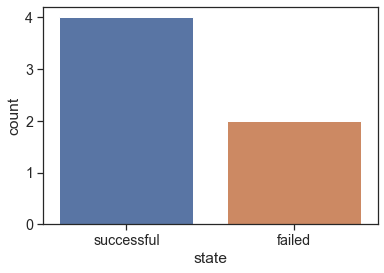

In [41]:
sns.countplot(x='state',data=df_fr_ind)

<AxesSubplot:xlabel='usd_pledged_real', ylabel='Density'>

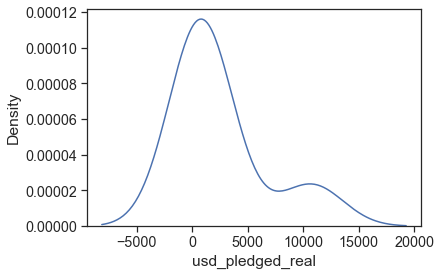

In [42]:
sns.kdeplot(df_fr_ind['usd_pledged_real'])

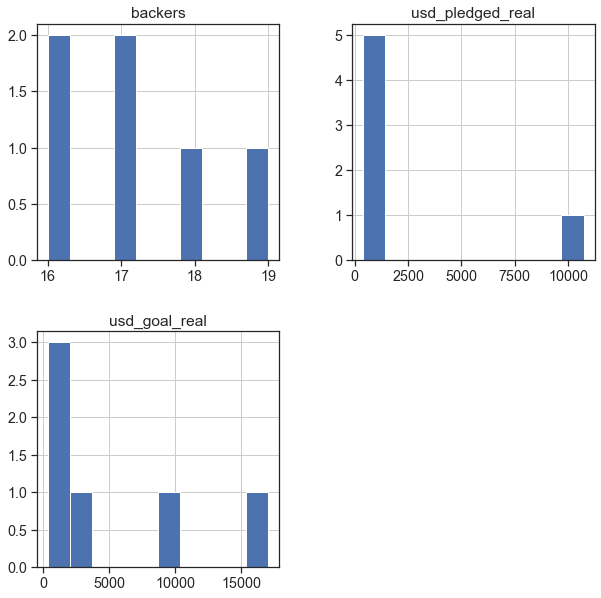

In [43]:
#histograms for each variable in dataset
df_fr_ind = df_fr_ind.hist(bins=10,figsize =(10,10))

In [44]:
df_it_ind = df_short[df_short['country'].str.contains('IT')]
df_it_ind = df_it_ind[df_it_ind.main_category == 'Fashion']
df_it_ind = df_it_ind[df_it_ind['state'].str.contains('canceled')==False]
df_it_ind = df_it_ind[df_it_ind['state'].str.contains('live')==False]
df_it_ind = df_it_ind[df_it_ind['state'].str.contains('suspended')==False]
df_it_ind.head()

,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real
3196,Ready-to-wear,Fashion,failed,18,IT,322.00,10591.99
49839,Apparel,Fashion,failed,16,IT,2127.64,26449.99
63737,Footwear,Fashion,failed,17,IT,4081.14,22168.03
73805,Accessories,Fashion,failed,19,IT,817.57,2131.36
95230,Accessories,Fashion,failed,19,IT,1306.13,11153.99


In [45]:
df_it_ind['state'].value_counts()

failed    10
Name: state, dtype: int64

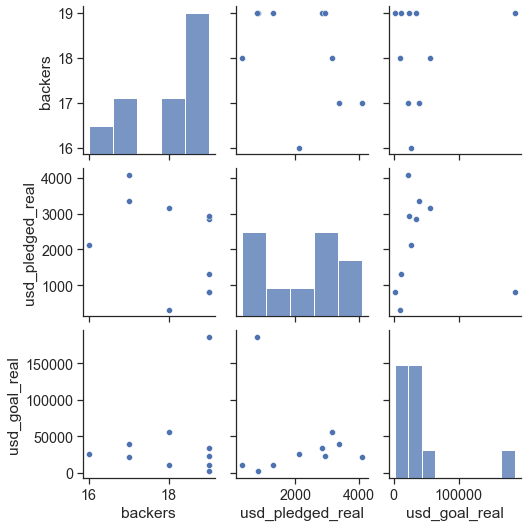

In [46]:
sns.pairplot(df_it_ind)

<AxesSubplot:xlabel='usd_pledged_real'>

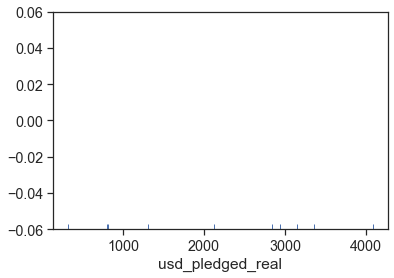

In [47]:
sns.rugplot(df_it_ind['usd_pledged_real'])

<AxesSubplot:xlabel='state', ylabel='count'>

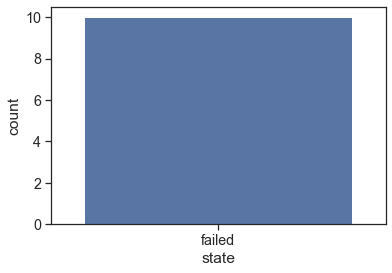

In [48]:
sns.countplot(x='state',data=df_it_ind)

<AxesSubplot:xlabel='usd_pledged_real', ylabel='Density'>

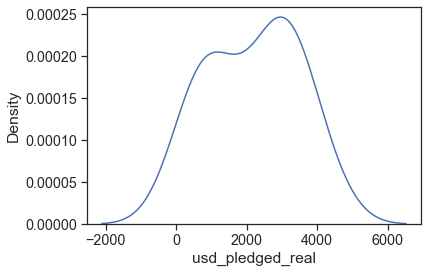

In [49]:
sns.kdeplot(df_it_ind['usd_pledged_real'])

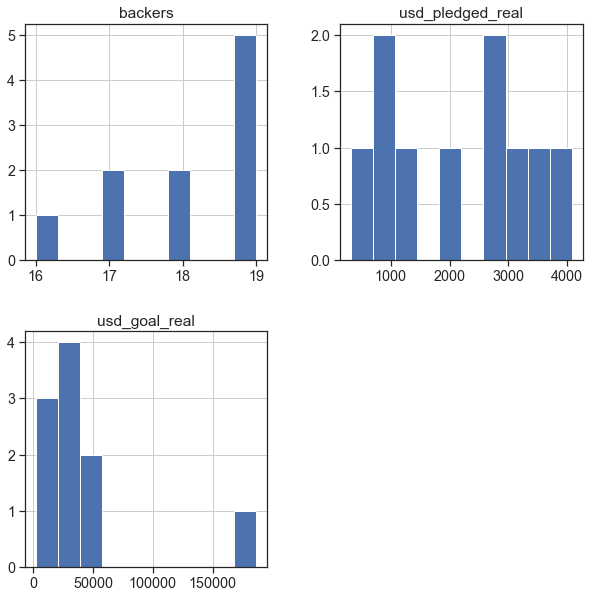

In [50]:
#histograms for each variable in dataset
df_it_ind = df_it_ind.hist(bins=10,figsize =(10,10))